In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
plt.rcParams["font.family"] = 'NanumSquare'

In [2]:
# data path
path = './data/01_제공데이터_update(210811)/'
food_data = pd.read_csv(path+'01_음식물쓰레기_FOOD_WASTE_210811_update.CSV',low_memory=False,encoding='CP949')
korean_data = pd.read_csv(path+'02-1_내국인유동인구_KOREAN.CSV',low_memory=False,encoding='CP949')
longterm_frgn_data = pd.read_csv(path+'02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV',low_memory=False,encoding='CP949')
shorttern_frgn_data = pd.read_csv(path+'02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV',low_memory=False,encoding='CP949')
resident_pop_data = pd.read_csv(path+'03_거주인구_RESIDENT_POP.CSV',low_memory=False,encoding='CP949')


In [10]:
korean_data.query('emd_nm== "한림읍" & sex== "여성" & time == 1 & base_date == "2018-01-01"')

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주
5,2018-01-01,1,제주시,50110250,한림읍,여성,20,0.0000,8.9235,359.9136,그외
6,2018-01-01,1,제주시,50110250,한림읍,여성,30,1002.1208,10.1911,217.4093,제주
7,2018-01-01,1,제주시,50110250,한림읍,여성,30,0.0000,0.0000,478.9798,그외
8,2018-01-01,1,제주시,50110250,한림읍,여성,40,1530.5014,38.2625,292.1866,제주
9,2018-01-01,1,제주시,50110250,한림읍,여성,40,0.0000,13.9136,340.8844,그외


## 장기체류, 단기체류 합쳐보기

In [11]:
longterm_frgn_data.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주


In [17]:
shorttern_frgn_data.head()

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078


In [14]:
# 단기는 resd=그외 에 합한다.

In [25]:
tmp_short = shorttern_frgn_data.copy()
tmp_short.rename(columns={'visit_pop_cnt':'short_visit_pop_cnt'},inplace=True)
tmp_short['resd']= '그외'

In [26]:
tmp_short

,base_date,time,nationality,city,emd_cd,emd_nm,short_visit_pop_cnt,resd
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170,그외
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308,그외
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771,그외
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962,그외
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078,그외
...,...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9.2120,그외
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0.6039,그외
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11.5473,그외
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0.2013,그외


In [28]:
print(tmp_short.emd_nm.unique())
print(longterm_frgn_data.emd_nm.unique())

['한림읍' '애월읍' '구좌읍' '조천읍' '한경면' '추자면' '우도면' '일도1동' '일도2동' '이도1동' '이도2동'
 '삼도1동' '삼도2동' '용담1동' '용담2동' '건입동' '화북동' '삼양동' '봉개동' '아라동' '오라동' '연동'
 '노형동' '외도동' '이호동' '도두동' '대정읍' '남원읍' '성산읍' '안덕면' '표선면' '송산동' '정방동' '중앙동'
 '천지동' '효돈동' '영천동' '동홍동' '서홍동' '대륜동' '대천동' '중문동' '예래동']
['한림읍' '애월읍' '구좌읍' '조천읍' '한경면' '추자면' '우도면' '일도1동' '일도2동' '이도1동' '이도2동'
 '삼도1동' '삼도2동' '용담1동' '용담2동' '건입동' '화북동' '삼양동' '봉개동' '아라동' '오라동' '연동'
 '노형동' '외도동' '이호동' '도두동' '대정읍' '남원읍' '성산읍' '안덕면' '표선면' '송산동' '정방동' '중앙동'
 '천지동' '효돈동' '영천동' '동홍동' '서홍동' '대륜동' '대천동' '중문동' '예래동']


In [27]:
total_frgn_data = pd.merge(longterm_frgn_data,tmp_short, on=('base_date','time','nationality','city','emd_cd','emd_nm','resd'),how='outer')

In [29]:
total_frgn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27230002 entries, 0 to 27230001
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   base_date            object 
 1   time                 int64  
 2   nationality          object 
 3   city                 object 
 4   emd_cd               int64  
 5   emd_nm               object 
 6   resd_pop_cnt         float64
 7   work_pop_cnt         float64
 8   visit_pop_cnt        float64
 9   resd                 object 
 10  short_visit_pop_cnt  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.4+ GB


In [30]:
total_frgn_data

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,short_visit_pop_cnt
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주,NaN
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주,NaN
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외,66.3170
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외,NaN
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27229997,2021-06-30,24,THA,서귀포시,50130580,서홍동,NaN,NaN,NaN,그외,0.0352
27229998,2021-06-30,24,ETC,서귀포시,50130580,서홍동,NaN,NaN,NaN,그외,2.7713
27229999,2021-06-30,24,THA,서귀포시,50130590,대륜동,NaN,NaN,NaN,그외,0.0176
27230000,2021-06-30,24,USA,서귀포시,50130610,중문동,NaN,NaN,NaN,그외,9.2120


In [32]:
total_frgn = total_frgn_data.fillna(0)


In [33]:
total_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,short_visit_pop_cnt
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주,0.0000
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주,0.0000
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외,66.3170
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외,0.0000
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
27229997,2021-06-30,24,THA,서귀포시,50130580,서홍동,0.0000,0.0000,0.0000,그외,0.0352
27229998,2021-06-30,24,ETC,서귀포시,50130580,서홍동,0.0000,0.0000,0.0000,그외,2.7713
27229999,2021-06-30,24,THA,서귀포시,50130590,대륜동,0.0000,0.0000,0.0000,그외,0.0176
27230000,2021-06-30,24,USA,서귀포시,50130610,중문동,0.0000,0.0000,0.0000,그외,9.2120


## 내국인 데이터랑 합치기

In [37]:
korean_data.head()

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주


In [36]:
# sex,age 통합
ko = korean_data.groupby(['base_date','time','city','emd_cd','emd_nm','resd']).sum()

In [40]:
ko = ko.drop(['age'],axis=1)

In [43]:
ko

resd_pop_cnt  work_pop_cnt  \
base_date  time city emd_cd   emd_nm resd                               
2018-01-01 1    서귀포시 50130250 대정읍    그외          0.0000      202.1096   
                                     제주      16030.5049      337.5891   
                     50130253 남원읍    그외          0.0000      154.9006   
                                     제주      12779.7359      377.5777   
                     50130259 성산읍    그외          0.0000      316.3545   
...                                                 ...           ...   
2021-06-30 24   제주시  50110670 외도동    제주      18279.9614      361.5846   
                     50110680 이호동    그외          0.0000       28.7565   
                                     제주       4285.1814      111.4640   
                     50110690 도두동    그외          0.0000       18.5559   
                                     제주       1729.3029       52.6143   

                                           visit_pop_cnt  
base_date  time city emd_cd   emd_nm resd                 
2018-01-01 1    서귀포시 50130250 대정읍    그외        2209.0496  
                                     제주        2736.7948  
                     50130253 남원읍    그외        4394.5311  
                                     제주        2552.0622  
                     50130259 성산읍    그외       11302.7765  
...                                                  ...  
2021-06-30 24   제주시  50110670 외도동    제주        1527.6817  
                     50110680 이호동    그외        1593.9006  
                                     제주        1708.9937  
                     50110690 도두동    그외        1287.9983  
                                     제주         564.1737  

[2635728 rows x 3 columns]

In [44]:
ko['nationality'] = 'KOR'

In [47]:
total_frgn.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,short_visit_pop_cnt
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주,0.000
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주,0.000
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외,66.317
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외,0.000
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주,0.000


In [49]:
total_df = pd.merge(ko,total_frgn, on=('base_date','time','city','emd_cd','emd_nm','resd','nationality'),how='outer')
total_df.fillna(0,inplace=True)

In [55]:
total_df['resd_pop_cnt'] = total_df['resd_pop_cnt_x'] + total_df['resd_pop_cnt_y']
total_df['work_pop_cnt'] = total_df['work_pop_cnt_x'] + total_df['work_pop_cnt_y']
total_df['visit_pop_cnt'] = total_df['visit_pop_cnt_x'] + total_df['visit_pop_cnt_y']
total_df = total_df.drop(['resd_pop_cnt_x','resd_pop_cnt_y','work_pop_cnt_x','work_pop_cnt_y','visit_pop_cnt_x','visit_pop_cnt_y'],axis=1)

In [61]:
# 단기 외국인 방문인구와 장기 외국인 방문 인구수를 합한 total_visit_pop
total_df['total_visit_pop'] = total_df['short_visit_pop_cnt'] + total_df['visit_pop_cnt']

In [62]:
total_df[20000000:20000010]

,base_date,time,city,emd_cd,emd_nm,resd,nationality,short_visit_pop_cnt,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,total_visit_pop
20000000,2020-08-08,19,제주시,50110259,조천읍,제주,BGD,0.0000,3.0971,0.000,0.0000,0.0000
20000001,2020-08-08,19,제주시,50110259,조천읍,제주,CAN,0.0000,8.3080,0.000,0.0000,0.0000
20000002,2020-08-08,19,제주시,50110259,조천읍,그외,CAN,0.0000,0.0000,0.000,8.3080,8.3080
20000003,2020-08-08,19,제주시,50110259,조천읍,제주,CHN,0.0000,182.8383,11.796,53.0821,53.0821
20000004,2020-08-08,19,제주시,50110259,조천읍,그외,CHN,0.7113,0.0000,0.000,88.4702,89.1815
20000005,2020-08-08,19,제주시,50110259,조천읍,제주,ETC,0.0000,21.7459,0.000,3.1066,3.1066
20000006,2020-08-08,19,제주시,50110259,조천읍,그외,ETC,2.5007,0.0000,0.000,18.6393,21.1400
20000007,2020-08-08,19,제주시,50110259,조천읍,그외,GBR,0.0000,0.0000,0.000,3.5069,3.5069
20000008,2020-08-08,19,제주시,50110259,조천읍,제주,IDN,0.0000,11.1248,0.000,25.9579,25.9579
20000009,2020-08-08,19,제주시,50110259,조천읍,그외,IDN,0.0000,0.0000,0.000,25.9579,25.9579


### 음식물 쓰레기 확인

In [53]:
food_data

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661


## 행정동별로 방문,거주,근무 인구 비율

In [69]:
tmp = total_df.groupby(['emd_nm']).sum()

In [99]:
ratio_df = tmp.drop(['time','emd_cd','short_visit_pop_cnt','visit_pop_cnt'],axis=1)

In [100]:
ratio_df = ratio_df.reset_index()
ratio_df

,emd_nm,resd_pop_cnt,work_pop_cnt,total_visit_pop
0,건입동,1.975293e+08,2.633392e+07,2.027231e+08
1,구좌읍,3.706708e+08,3.879235e+07,2.419392e+08
2,남원읍,3.895400e+08,3.182937e+07,2.269364e+08
3,노형동,1.555637e+09,1.679522e+08,6.443676e+08
4,대륜동,3.915607e+08,3.962026e+07,2.437102e+08
5,대정읍,5.258869e+08,3.350069e+07,2.065247e+08
6,대천동,1.980159e+08,1.814729e+07,1.698325e+08
7,도두동,3.630147e+07,6.115403e+06,1.118986e+08
8,동홍동,5.232755e+08,4.621295e+07,2.178373e+08
9,봉개동,1.111602e+08,2.366167e+07,1.317246e+08


In [125]:
n = '효돈동'
ratio_df[ratio_df['emd_nm']==name].drop('emd_nm',axis=1).values.reshape(3,)

array([1.97529270e+08, 2.63339181e+07, 2.02723129e+08])

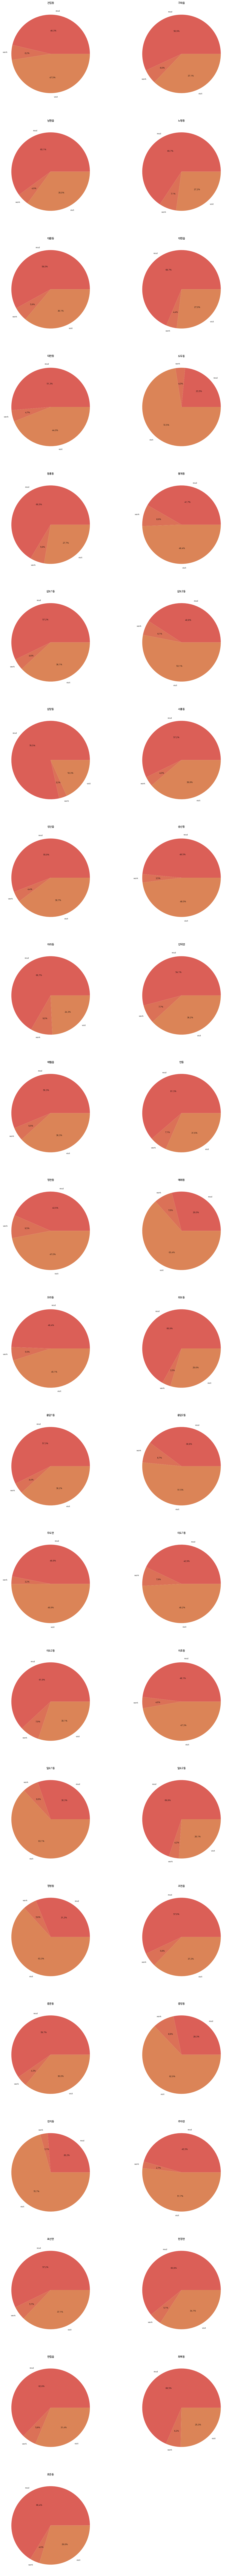

In [139]:
fig = plt.figure(figsize=(20,220))
colors = sns.color_palette('hls',len(ratio_df))
emd = ratio_df.emd_nm
for idx,name in enumerate(emd):
    ax_tmp = 'ax' + str(idx)
    ax_tmp = fig.add_subplot(22,2,idx+1)
    ax_tmp.set_title(name,fontweight=600)
    ax_tmp.pie(ratio_df[ratio_df['emd_nm']==name].drop('emd_nm',axis=1).values.reshape(3,),labels=['resd','work','visit'],autopct='%.1f%%',colors=colors)

In [204]:
em_g_list = food_data.groupby(['emd_nm']).sum()[['pay_amt','em_g']].sort_values(by='em_g',ascending=False).index

## 쓰레기 양이 많은 행정동 위주로 다시 보기

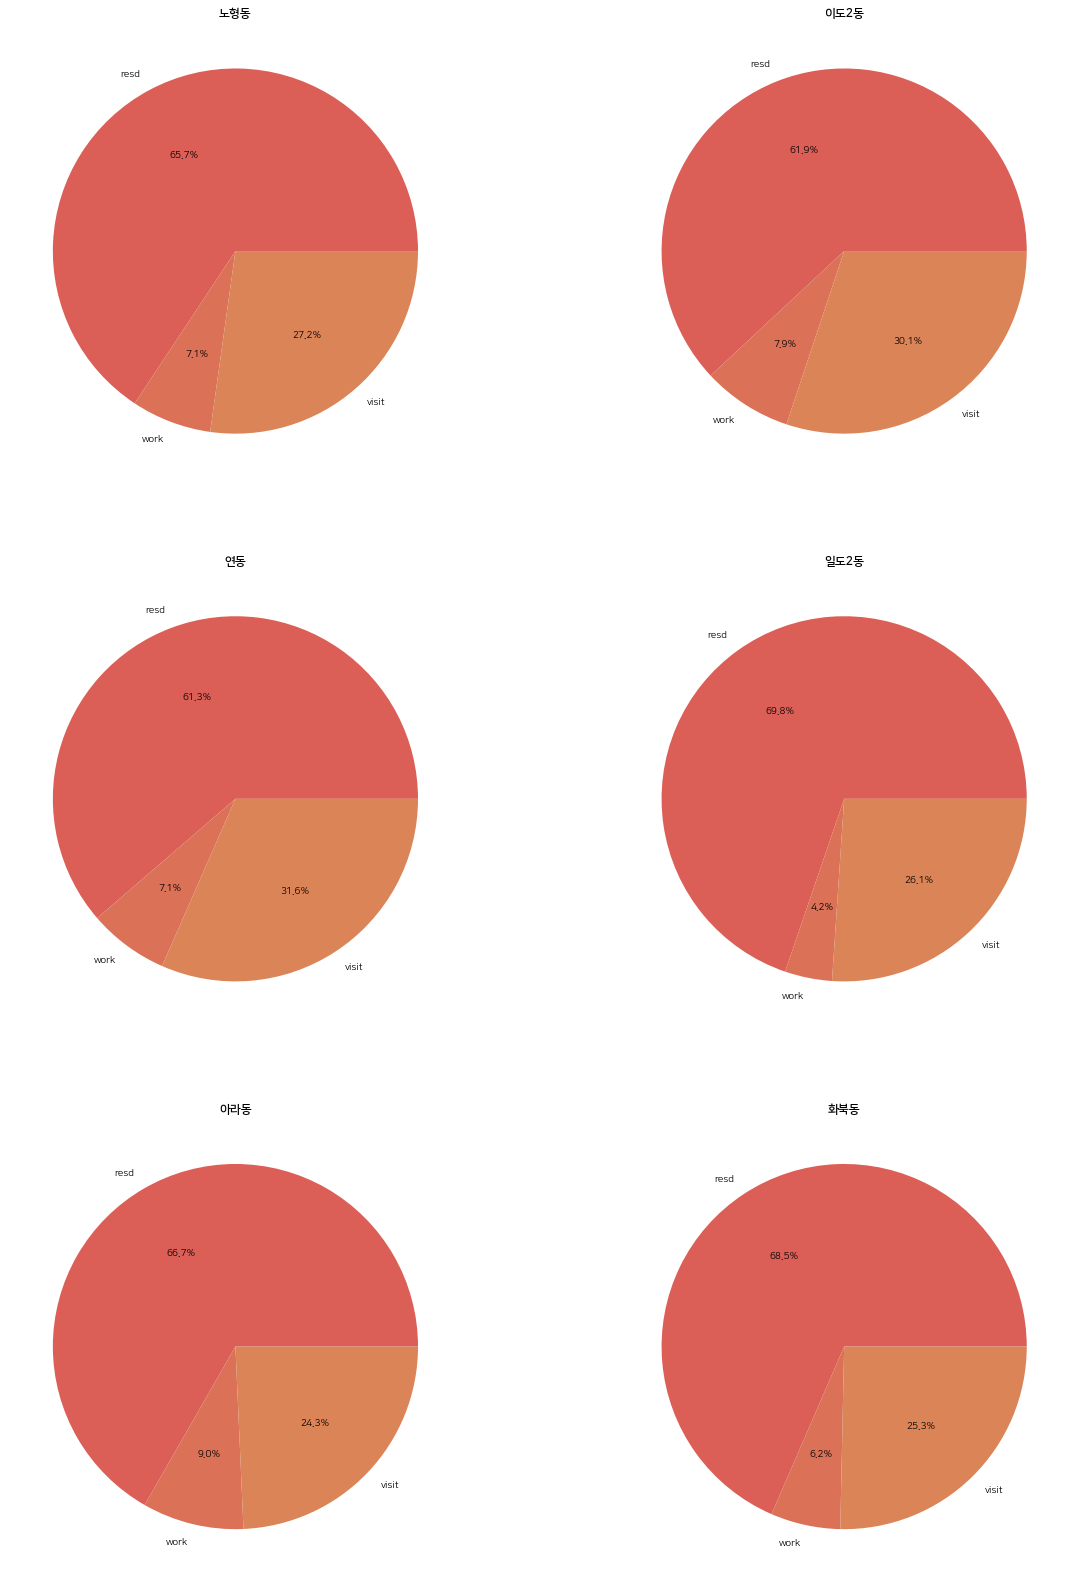

In [151]:
fig = plt.figure(figsize=(20,220))
colors = sns.color_palette('hls',len(ratio_df))
emd = ['노형동','이도2동','연동','일도2동','아라동','화북동']
for idx,name in enumerate(emd):
    ax_tmp = 'ax' + str(idx)
    ax_tmp = fig.add_subplot(22,2,idx+1)
    ax_tmp.set_title(name,fontweight=600)
    ax_tmp.pie(ratio_df[ratio_df['emd_nm']==name].drop('emd_nm',axis=1).values.reshape(3,),labels=['resd','work','visit'],autopct='%.1f%%',colors=colors)

- 다른 행정동보다 거주인구가 높은 곳이 쓰레기 처리비용이 높음

## 국적별로 주요 행정동 인구비율

In [152]:
tmp = total_df.groupby(['emd_nm','nationality']).sum()

In [154]:
ratio_df = tmp.drop(['time','emd_cd','short_visit_pop_cnt','visit_pop_cnt'],axis=1)

In [156]:
ratio_df = ratio_df.reset_index()

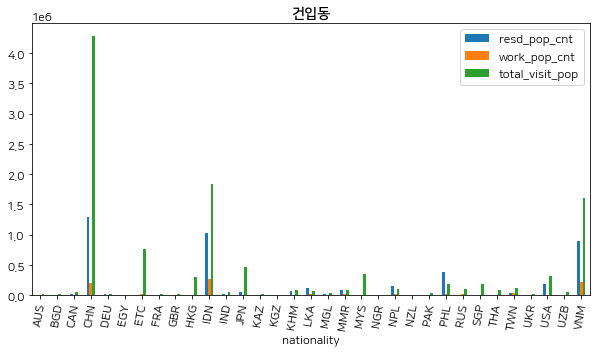

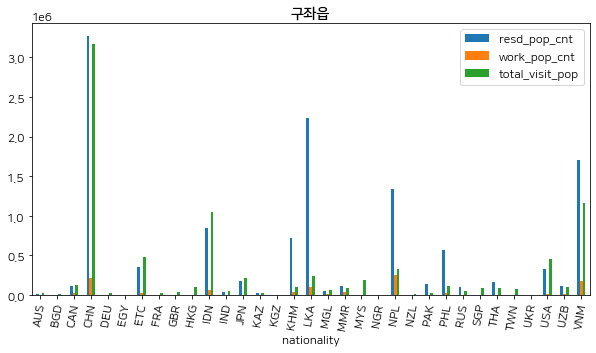

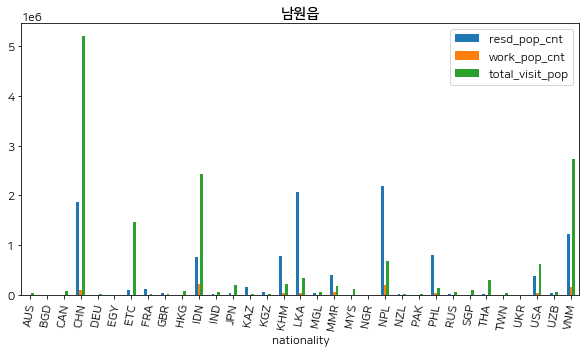

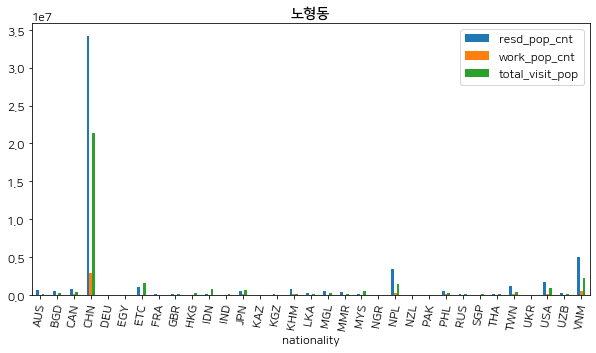

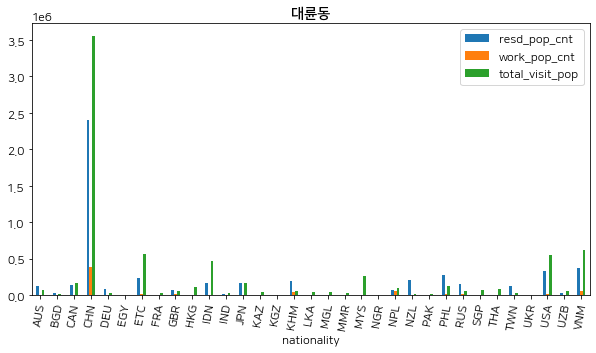

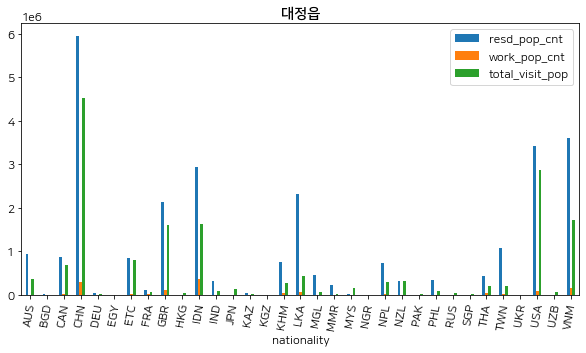

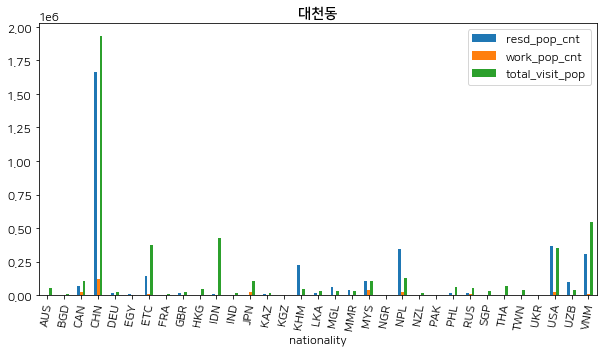

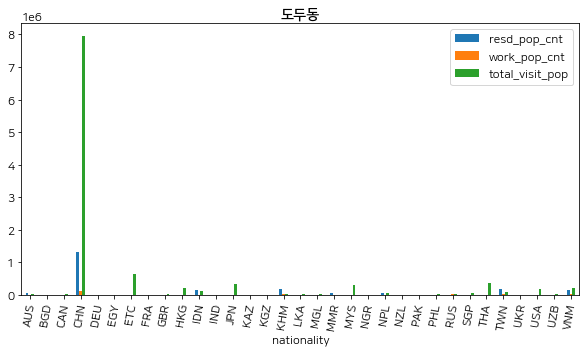

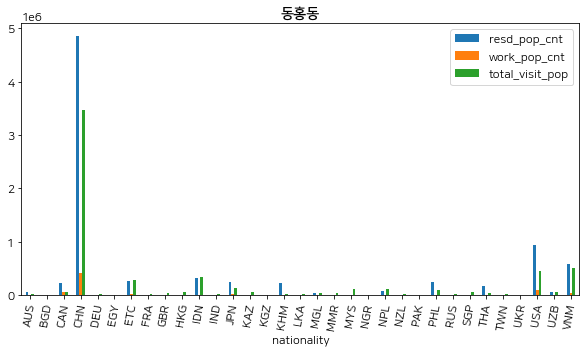

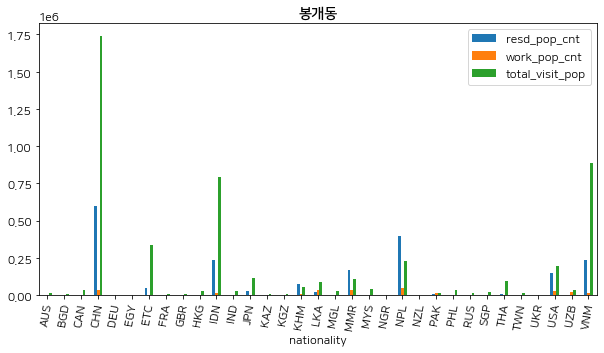

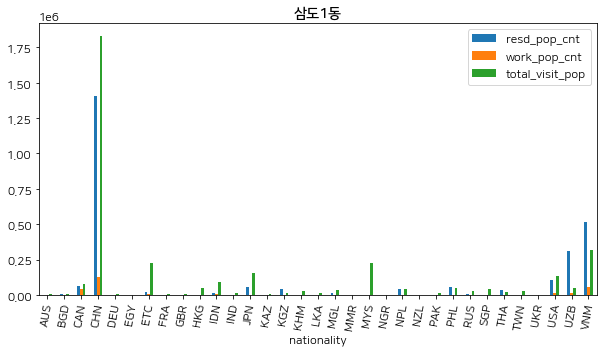

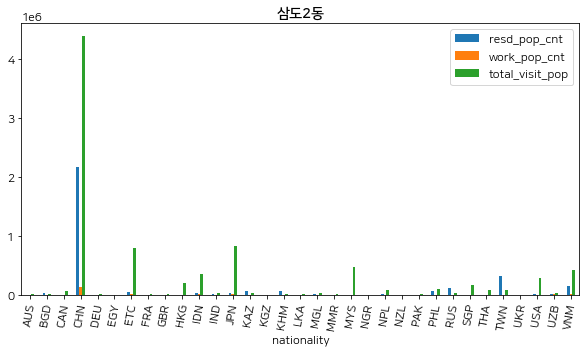

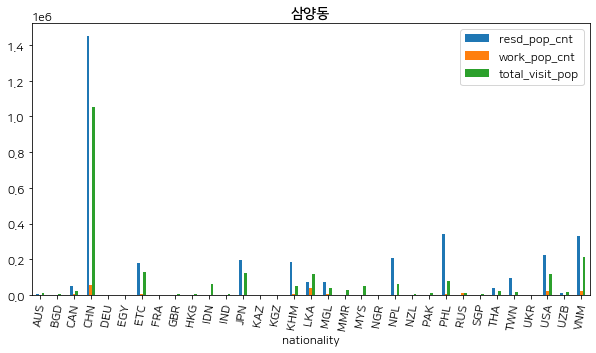

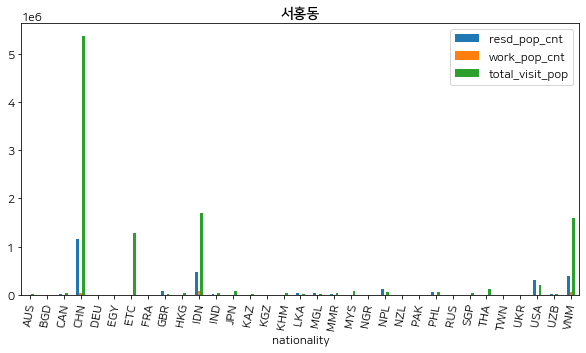

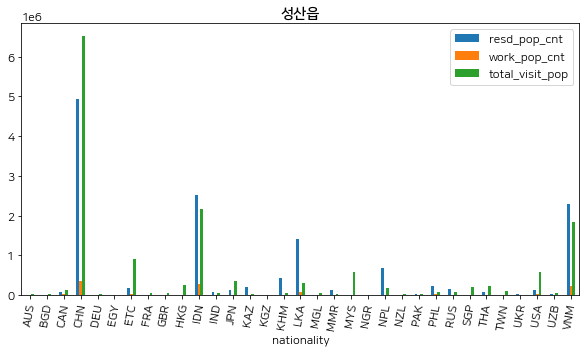

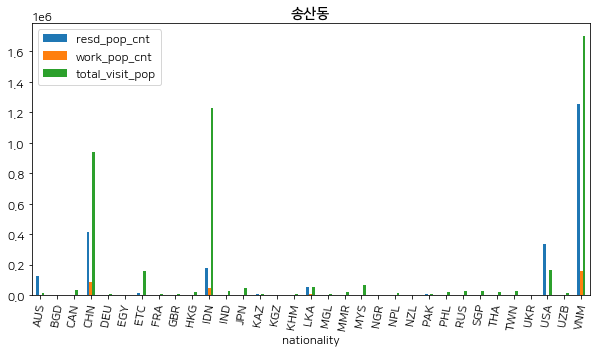

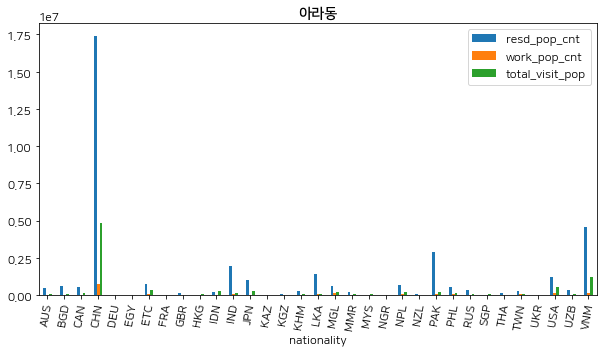

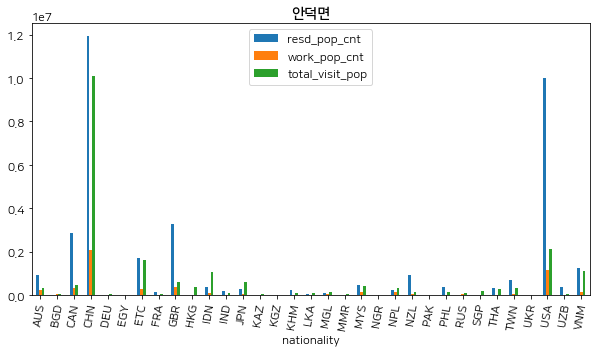

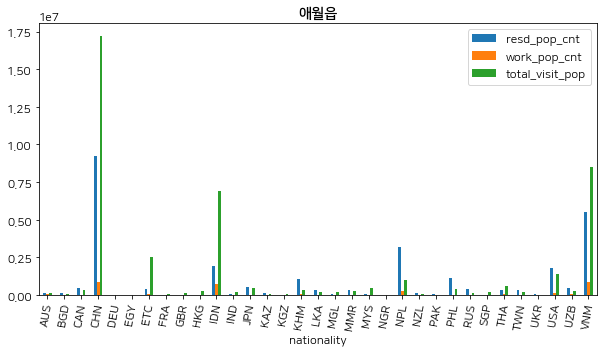

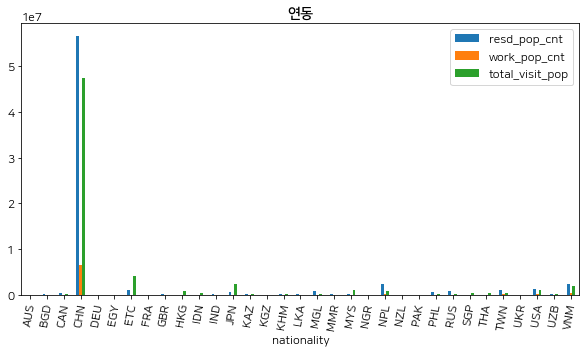

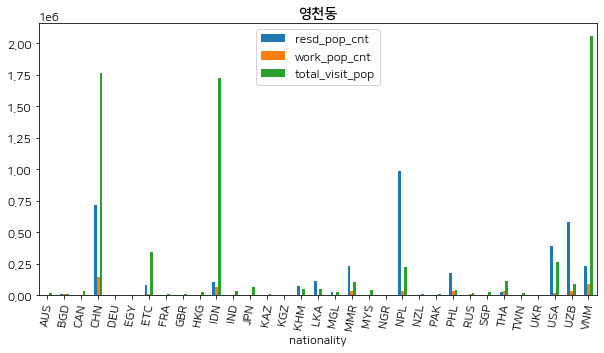

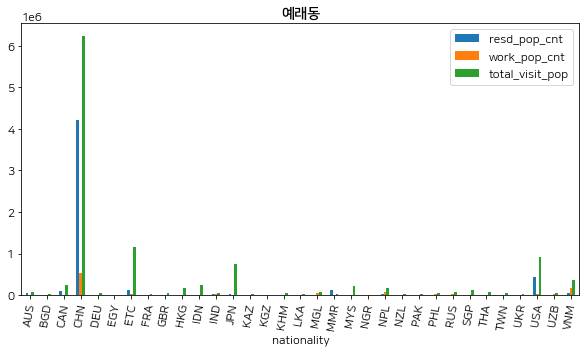

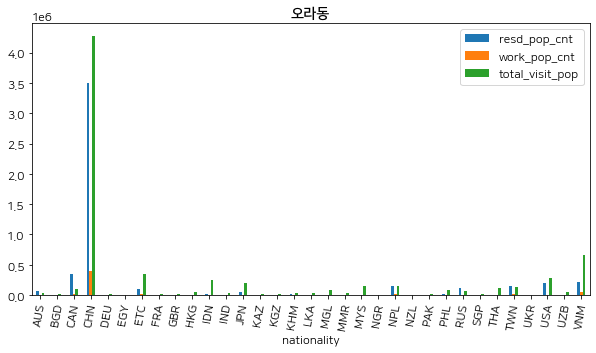

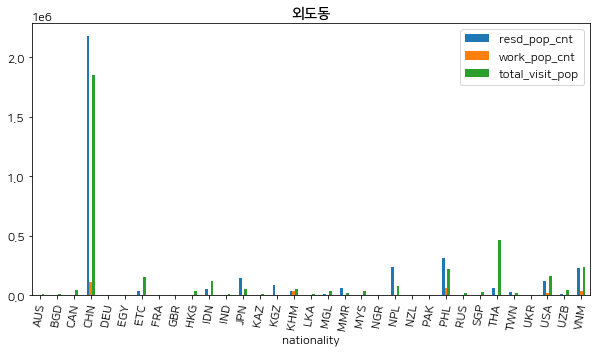

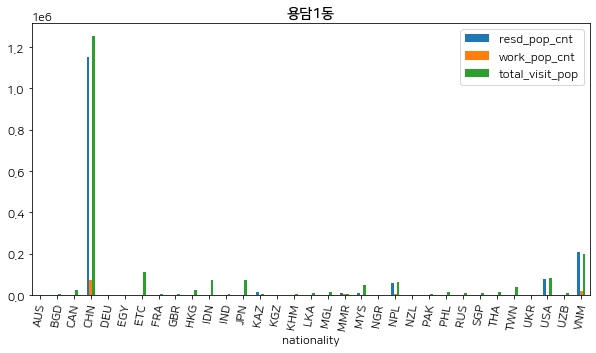

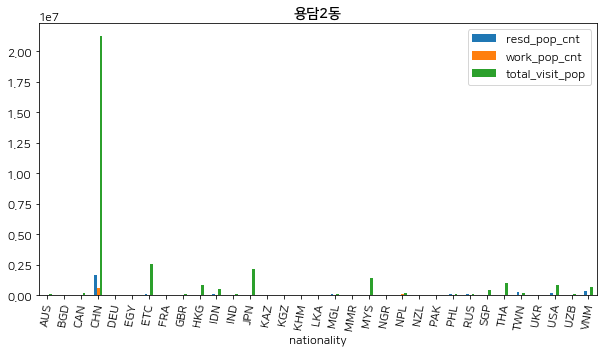

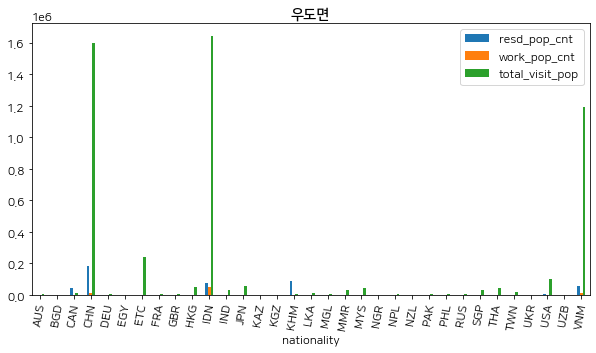

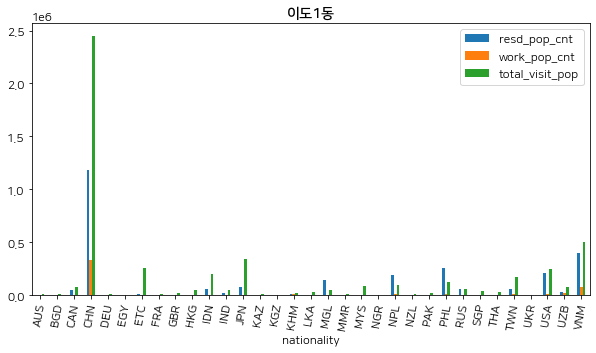

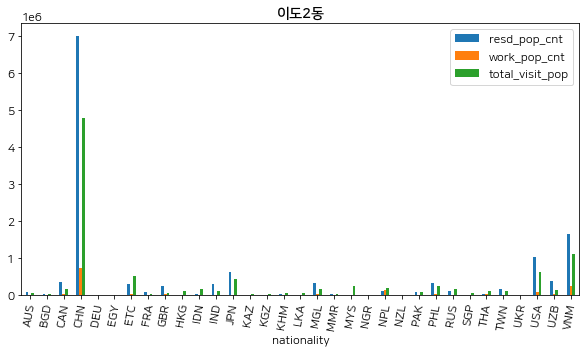

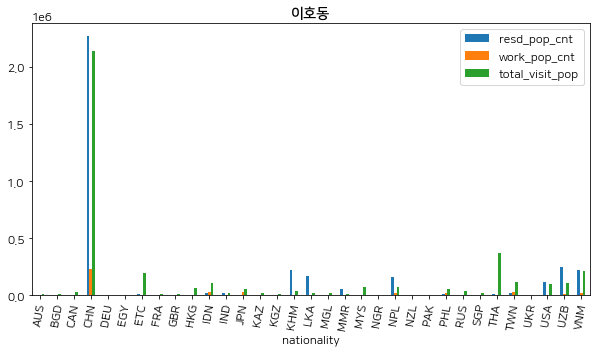

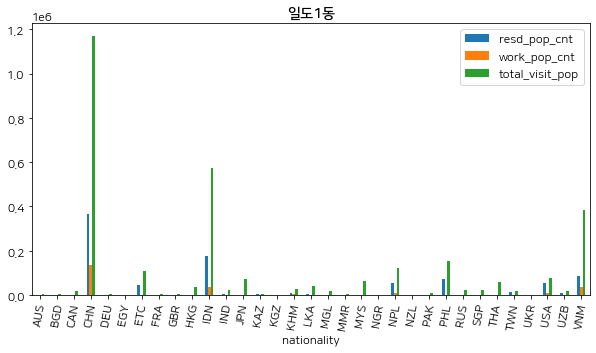

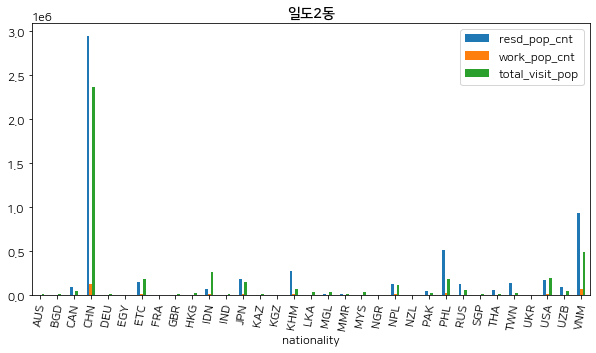

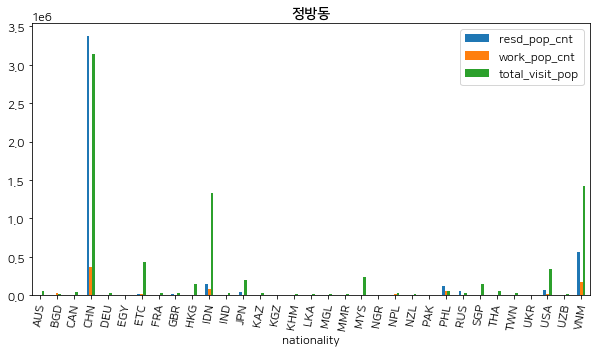

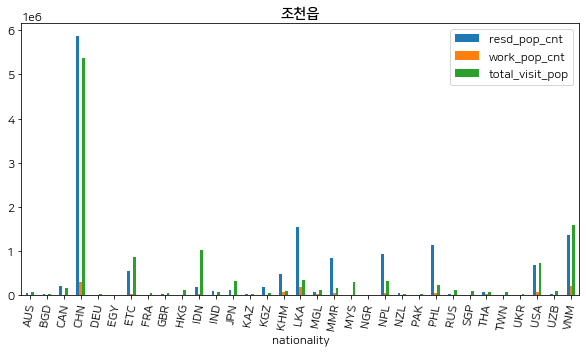

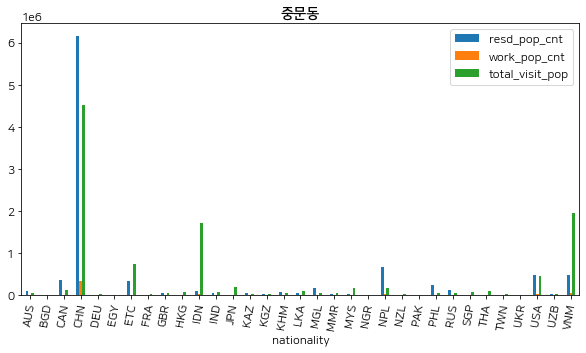

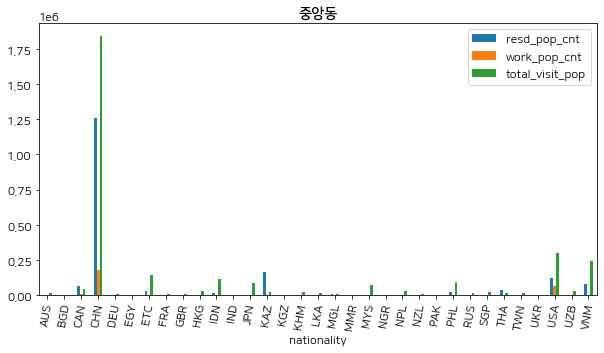

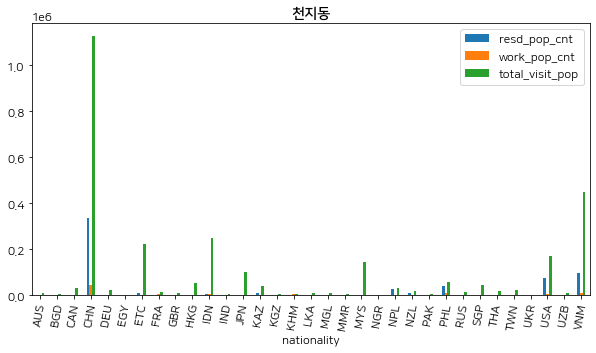

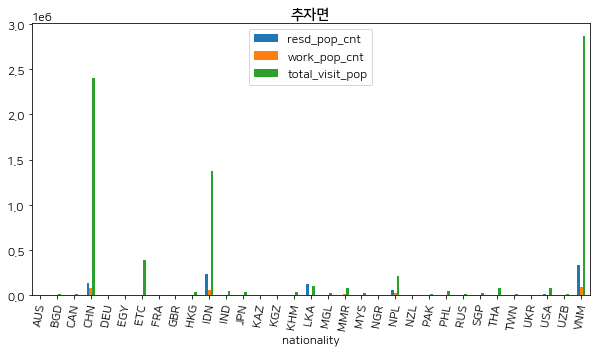

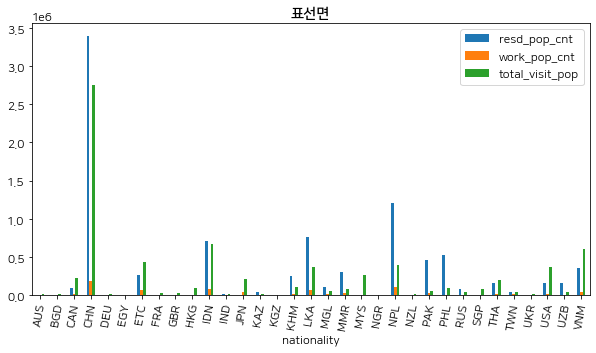

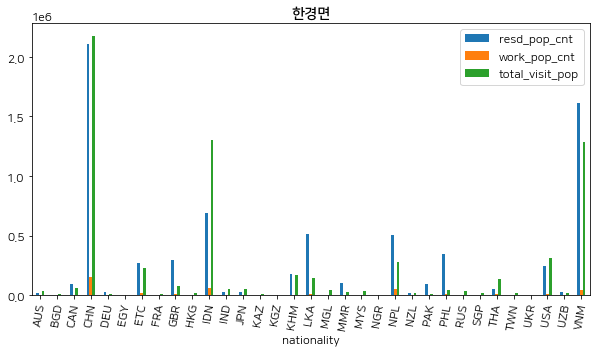

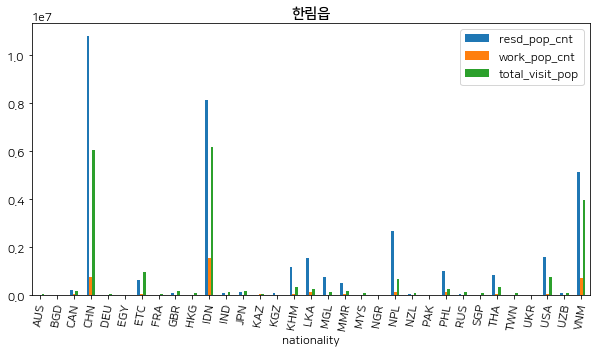

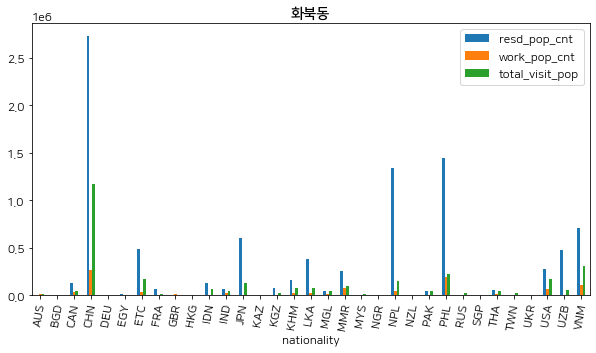

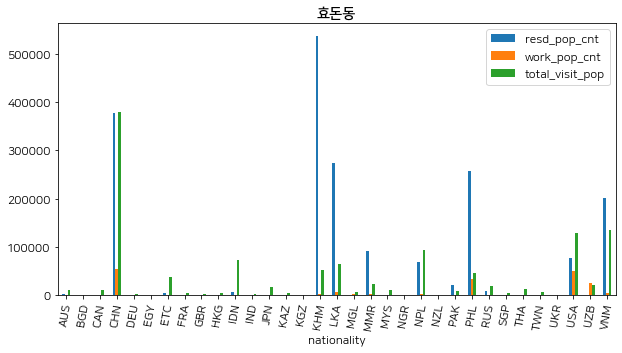

In [198]:
colors = sns.color_palette('hls',len(ratio_df))
emd = ratio_df.emd_nm.unique()
plt.rc('font', size=12)
for idx,name in enumerate(emd):
    ratio_df[ratio_df['emd_nm']==name].query("nationality != 'KOR'").plot(x='nationality',y=['resd_pop_cnt','work_pop_cnt','total_visit_pop'],kind='bar',figsize=(10,5))
    plt.title(name,fontweight=600)
    plt.xticks(rotation=80)

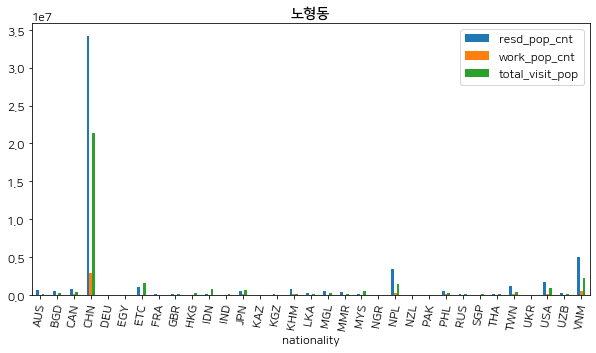

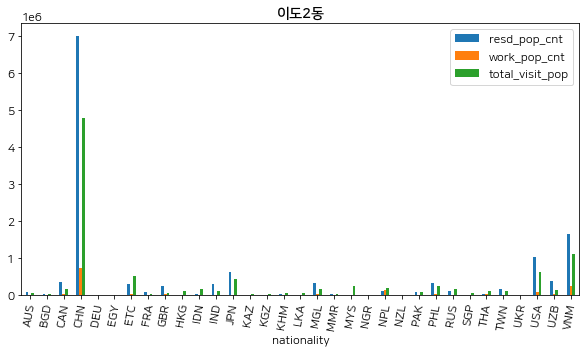

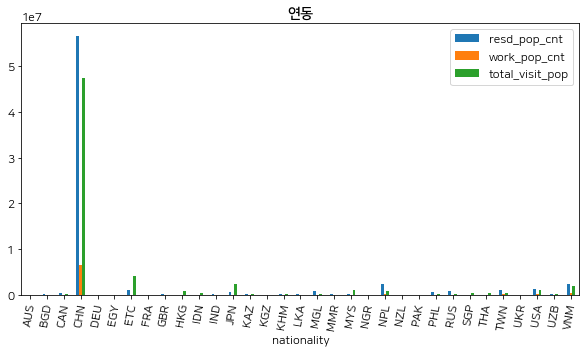

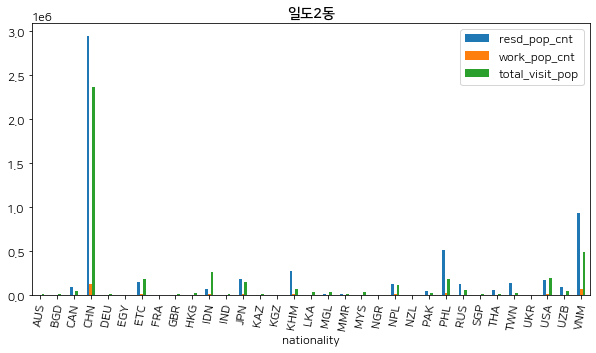

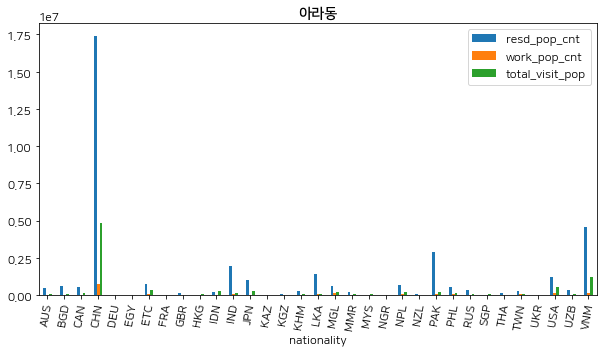

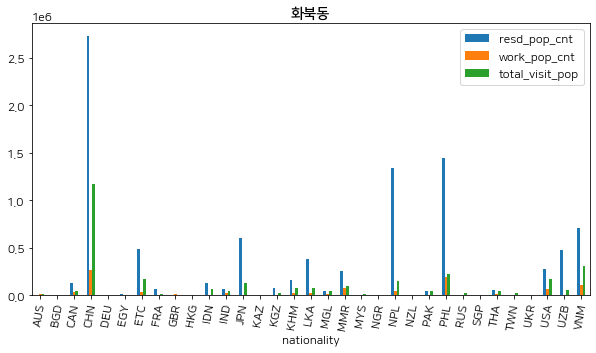

In [199]:
plt.rc('font', size=12)
colors = sns.color_palette('hls',len(ratio_df))
emd = ['노형동','이도2동','연동','일도2동','아라동','화북동']
nations = ratio_df.nationality.unique()
for idx,name in enumerate(emd):
    ratio_df[ratio_df['emd_nm']==name].query("nationality != 'KOR'").plot(x='nationality',y=['resd_pop_cnt','work_pop_cnt','total_visit_pop'],kind='bar',figsize=(10,5))
    plt.title(name,fontweight=600)
    plt.xticks(rotation=80)

- 상대적으로 중국인 거주 비율이 높다.

In [206]:
ratio_df

,emd_nm,nationality,resd_pop_cnt,work_pop_cnt,total_visit_pop
0,건입동,AUS,0.000000e+00,0.0000,1.431610e+04
1,건입동,BGD,5.477719e+02,435.0755,1.427050e+04
2,건입동,CAN,2.401552e+04,0.0000,5.191357e+04
3,건입동,CHN,1.292201e+06,204126.1715,4.279526e+06
4,건입동,DEU,2.504722e+04,3418.0998,1.878872e+04
...,...,...,...,...,...
1457,효돈동,TWN,0.000000e+00,0.0000,7.047209e+03
1458,효돈동,UKR,0.000000e+00,0.0000,1.730716e+02
1459,효돈동,USA,7.778037e+04,50237.7411,1.278118e+05
1460,효돈동,UZB,0.000000e+00,25635.1479,2.015563e+04


## 한국인 행정동별 비율 보기
- 쓰레기 양 순
- ['노형동','이도2동','연동','일도2동','아라동','화북동''동홍동', '삼양동', '외도동', '대정읍','용담2동', '삼도1동', '오라동', '중문동', '남원읍', '대천동', '대륜동', '이도1동', '중앙동', '성산읍', '건입동', '서홍동', '애월읍', '삼도2동', '용담1동', '천지동', '한림읍', '영천동', '안덕면', '송산동', '표선면', '조천읍', '정방동', '이호동', '일도1동', '도두동', '예래동', '봉개동', '효돈동', '구좌읍', '한경면', '알수없음']

<AxesSubplot:xlabel='emd_nm'>

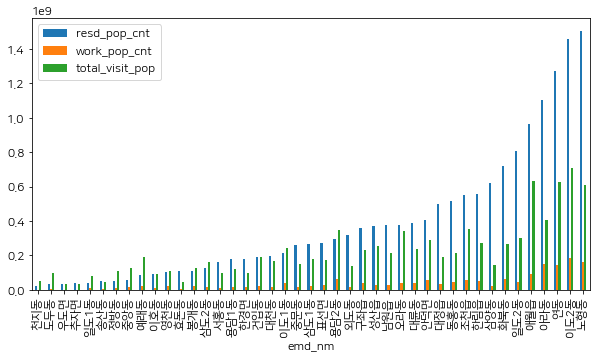

In [210]:

ratio_df.query("nationality == 'KOR'").sort_values('resd_pop_cnt').plot(x='emd_nm',y=['resd_pop_cnt','work_pop_cnt','total_visit_pop'],kind='bar',figsize=(10,5))

- 한국인 거주 인구가 많을수록 쓰레기가 많이 나온다.
- 방문인구는 생각보다 중요하지 않다.

## 쓰레기양과 상관관계 계수

In [216]:
corr_total = total_df.groupby(['base_date','city','emd_nm']).sum().drop(['time','emd_cd'],axis=1)
corr_total = corr_total.reset_index()
corr_total

,base_date,city,emd_nm,short_visit_pop_cnt,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,total_visit_pop
0,2018-01-01,서귀포시,남원읍,3552.3268,291408.8966,18744.1306,216036.5300,219588.8568
1,2018-01-01,서귀포시,대륜동,1347.0481,267671.7783,20177.9069,211431.5312,212778.5793
2,2018-01-01,서귀포시,대정읍,1988.0280,385419.3057,16536.3590,159434.6844,161422.7124
3,2018-01-01,서귀포시,대천동,1072.5069,155036.9247,9403.9692,149809.9020,150882.4089
4,2018-01-01,서귀포시,동홍동,1516.3274,372744.3910,26351.6984,159251.9295,160768.2569
...,...,...,...,...,...,...,...,...
54906,2021-06-30,제주시,조천읍,149.3947,471039.8550,55615.3591,328176.5723,328325.9670
54907,2021-06-30,제주시,추자면,198.9642,33025.0116,2049.0228,27782.3658,27981.3300
54908,2021-06-30,제주시,한경면,12.4909,174090.5741,16331.8170,104109.3077,104121.7986
54909,2021-06-30,제주시,한림읍,72.9285,495019.9723,50602.0407,301729.6844,301802.6129


In [219]:
corr_food = food_data.groupby(['base_date','city','emd_nm']).sum()
corr_food = corr_food.reset_index()
corr_food

,base_date,city,emd_nm,em_cnt,em_g,pay_amt
0,2018-01-01,서귀포시,남원읍,304,1239600,37110
1,2018-01-01,서귀포시,대륜동,650,1717700,50076
2,2018-01-01,서귀포시,대정읍,309,1264950,37872
3,2018-01-01,서귀포시,대천동,696,1765600,52008
4,2018-01-01,서귀포시,동홍동,1567,4165050,122434
...,...,...,...,...,...,...
50517,2021-06-30,제주시,일도2동,2856,4963450,148195
50518,2021-06-30,제주시,조천읍,981,2175450,65043
50519,2021-06-30,제주시,한경면,269,973850,29152
50520,2021-06-30,제주시,한림읍,870,3298100,98740


In [220]:
corr_df = pd.merge(corr_total,corr_food, on=('base_date','city','emd_nm'),how='outer')
corr_df.head()

,base_date,city,emd_nm,short_visit_pop_cnt,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,total_visit_pop,em_cnt,em_g,pay_amt
0,2018-01-01,서귀포시,남원읍,3552.3268,291408.8966,18744.1306,216036.5300,219588.8568,304.0,1239600.0,37110.0
1,2018-01-01,서귀포시,대륜동,1347.0481,267671.7783,20177.9069,211431.5312,212778.5793,650.0,1717700.0,50076.0
2,2018-01-01,서귀포시,대정읍,1988.0280,385419.3057,16536.3590,159434.6844,161422.7124,309.0,1264950.0,37872.0
3,2018-01-01,서귀포시,대천동,1072.5069,155036.9247,9403.9692,149809.9020,150882.4089,696.0,1765600.0,52008.0
4,2018-01-01,서귀포시,동홍동,1516.3274,372744.3910,26351.6984,159251.9295,160768.2569,1567.0,4165050.0,122434.0


<AxesSubplot:>

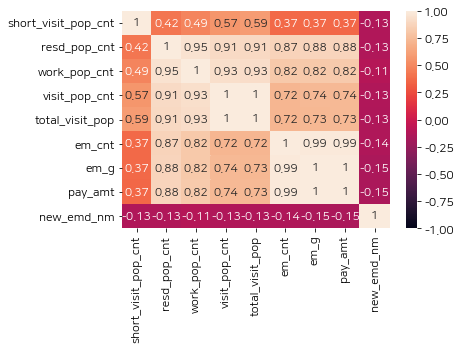

In [227]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tmp = corr_df.groupby(['emd_nm']).sum().reset_index()
tmp['new_emd_nm'] = le.fit_transform(tmp['emd_nm'])
plt.figsize=(10,10)
sns.heatmap(tmp.drop('emd_nm',axis=1).corr(),annot=True,vmin=-1,vmax=1)

- em_g 기준 : pay_amt, em_cnt, resd_pop_cnt, work_pop_cnt, visit_pop_cnt(장기거주), total_visit(장기 + 단기), short_visit(단기) 순

## 외국인 비중 칼럼 추가해서 상관계수 확인하기

In [243]:
tmp = total_df.copy()

In [244]:
def turn_foreign(df):
    if df['nationality'] != 'KOR':
        return 'FOR'
    else:
        return 'KOR'

In [245]:
tmp['nationality'] = tmp.apply(lambda x: turn_foreign(x),axis=1)

In [261]:
sum_df.head()

,short_visit_pop_cnt,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,total_visit_pop
emd_nm,,,,,
건입동,4.583509e+06,1.975293e+08,2.633392e+07,1.981396e+08,2.027231e+08
구좌읍,2.248636e+06,3.706708e+08,3.879235e+07,2.396905e+08,2.419392e+08
남원읍,6.099167e+06,3.895400e+08,3.182937e+07,2.208372e+08,2.269364e+08
노형동,1.188135e+07,1.555637e+09,1.679522e+08,6.324862e+08,6.443676e+08
대륜동,2.406326e+06,3.915607e+08,3.962026e+07,2.413039e+08,2.437102e+08


In [264]:
foreign_df.head()

,emd_nm,short_visit_pop_cnt,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,total_visit_pop
0,건입동,4.583509e+06,4.383246e+06,8.226572e+05,6.651496e+06,1.123500e+07
2,구좌읍,2.248636e+06,1.240610e+07,1.026749e+06,6.325688e+06,8.574324e+06
4,남원읍,6.099167e+06,1.117942e+07,9.368953e+05,9.261494e+06,1.536066e+07
6,노형동,1.188135e+07,5.330287e+07,4.722144e+06,2.119287e+07,3.307422e+07
8,대륜동,2.406326e+06,5.199778e+06,6.383872e+05,5.012647e+06,7.418972e+06


In [265]:
k_f_df = tmp.groupby(['emd_nm','nationality']).sum().drop(['time','emd_cd'],axis=1).reset_index()
sum_df = k_f_df.groupby('emd_nm').sum().reset_index()
foreign_df = k_f_df.query("nationality == 'FOR'").drop('nationality',axis=1).reset_index()
fore_ratio = pd.merge(sum_df,foreign_df,on='emd_nm')
fore_ratio

,emd_nm,short_visit_pop_cnt_x,resd_pop_cnt_x,work_pop_cnt_x,visit_pop_cnt_x,total_visit_pop_x,index,short_visit_pop_cnt_y,resd_pop_cnt_y,work_pop_cnt_y,visit_pop_cnt_y,total_visit_pop_y
0,건입동,4.583509e+06,1.975293e+08,2.633392e+07,1.981396e+08,2.027231e+08,0,4.583509e+06,4.383246e+06,8.226572e+05,6.651496e+06,1.123500e+07
1,구좌읍,2.248636e+06,3.706708e+08,3.879235e+07,2.396905e+08,2.419392e+08,2,2.248636e+06,1.240610e+07,1.026749e+06,6.325688e+06,8.574324e+06
2,남원읍,6.099167e+06,3.895400e+08,3.182937e+07,2.208372e+08,2.269364e+08,4,6.099167e+06,1.117942e+07,9.368953e+05,9.261494e+06,1.536066e+07
3,노형동,1.188135e+07,1.555637e+09,1.679522e+08,6.324862e+08,6.443676e+08,6,1.188135e+07,5.330287e+07,4.722144e+06,2.119287e+07,3.307422e+07
4,대륜동,2.406326e+06,3.915607e+08,3.962026e+07,2.413039e+08,2.437102e+08,8,2.406326e+06,5.199778e+06,6.383872e+05,5.012647e+06,7.418972e+06
5,대정읍,1.428985e+06,5.258869e+08,3.350069e+07,2.050957e+08,2.065247e+08,10,1.428985e+06,2.802206e+07,1.358550e+06,1.542092e+07,1.684991e+07
6,대천동,1.154728e+06,1.980159e+08,1.814729e+07,1.686778e+08,1.698325e+08,12,1.154728e+06,3.518622e+06,2.923183e+05,3.551146e+06,4.705874e+06
7,도두동,8.259653e+06,3.630147e+07,6.115403e+06,1.036390e+08,1.118986e+08,14,8.259653e+06,2.202559e+06,2.898922e+05,2.650063e+06,1.090972e+07
8,동홍동,1.711916e+06,5.232755e+08,4.621295e+07,2.161254e+08,2.178373e+08,16,1.711916e+06,8.307067e+06,6.546394e+05,4.405451e+06,6.117367e+06
9,봉개동,1.488437e+06,1.111602e+08,2.366167e+07,1.302362e+08,1.317246e+08,18,1.488437e+06,1.971340e+06,2.457150e+05,3.495878e+06,4.984315e+06


In [274]:
k_f_df = tmp.groupby(['emd_nm','nationality']).sum().drop(['time','emd_cd'],axis=1).reset_index()
sum_df = k_f_df.groupby('emd_nm').sum().reset_index()
sum_df['pop'] = sum_df['resd_pop_cnt'] + sum_df['work_pop_cnt'] + sum_df['total_visit_pop']
sum_df = sum_df[['emd_nm','pop']]

foreign_df = k_f_df.query("nationality == 'FOR'").drop('nationality',axis=1).reset_index()
foreign_df['pop'] = foreign_df['resd_pop_cnt'] + foreign_df['work_pop_cnt'] + foreign_df['total_visit_pop']
foreign_df = foreign_df[['emd_nm','pop']]
full_fore_ratio = pd.merge(sum_df,foreign_df,on='emd_nm')
full_fore_ratio

,emd_nm,pop_x,pop_y
0,건입동,4.265863e+08,1.644091e+07
1,구좌읍,6.514023e+08,2.200717e+07
2,남원읍,6.483058e+08,2.747697e+07
3,노형동,2.367957e+09,9.109923e+07
4,대륜동,6.748912e+08,1.325714e+07
5,대정읍,7.659123e+08,4.623052e+07
6,대천동,3.859957e+08,8.516815e+06
7,도두동,1.543155e+08,1.340217e+07
8,동홍동,7.873257e+08,1.507907e+07
9,봉개동,2.665465e+08,7.201370e+06


In [275]:
# 전체인구대비 외국인 비중
full_fore_ratio['외국인백분위'] = full_fore_ratio['pop_y'] / full_fore_ratio['pop_x'] * 100
full_fore_ratio = full_fore_ratio[['emd_nm','외국인백분위']]

In [266]:
# 각각 인구에서의 외국인 비중
fore_ratio['resd'] = fore_ratio['resd_pop_cnt_y'] / fore_ratio['resd_pop_cnt_x'] * 100
fore_ratio['work'] = fore_ratio['work_pop_cnt_y'] / fore_ratio['work_pop_cnt_x'] * 100
fore_ratio['visit'] = fore_ratio['total_visit_pop_y'] / fore_ratio['total_visit_pop_x'] * 100
fore_ratio = fore_ratio[['emd_nm','resd','work','visit']]
fore_ratio

,emd_nm,resd,work,visit
0,건입동,2.219036,3.123945,5.542044
1,구좌읍,3.346932,2.646782,3.544000
2,남원읍,2.869902,2.943493,6.768707
3,노형동,3.426433,2.811599,5.132819
4,대륜동,1.327962,1.611264,3.044178
5,대정읍,5.328533,4.055291,8.158788
6,대천동,1.776940,1.610809,2.770891
7,도두동,6.067411,4.740360,9.749643
8,동홍동,1.587513,1.416571,2.808228
9,봉개동,1.773422,1.038452,3.783890


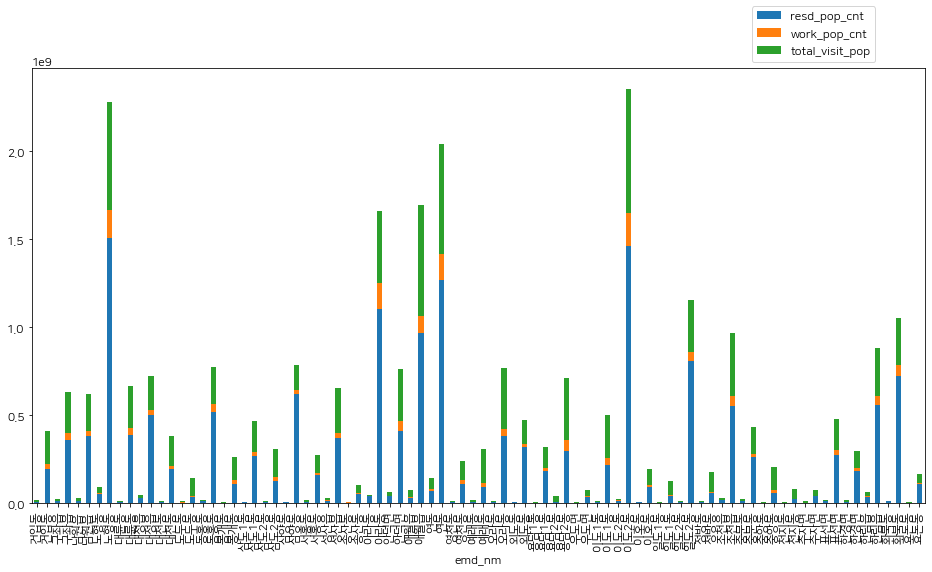

In [256]:
# 앞에가 외국인, 뒤에가 한국인 (건입동_FOR, 건입동_KOR, 구좌읍_FOR...)
k_f_df.plot(x='emd_nm',y=['resd_pop_cnt','work_pop_cnt','total_visit_pop'],kind='bar',stacked=True,figsize=(16,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

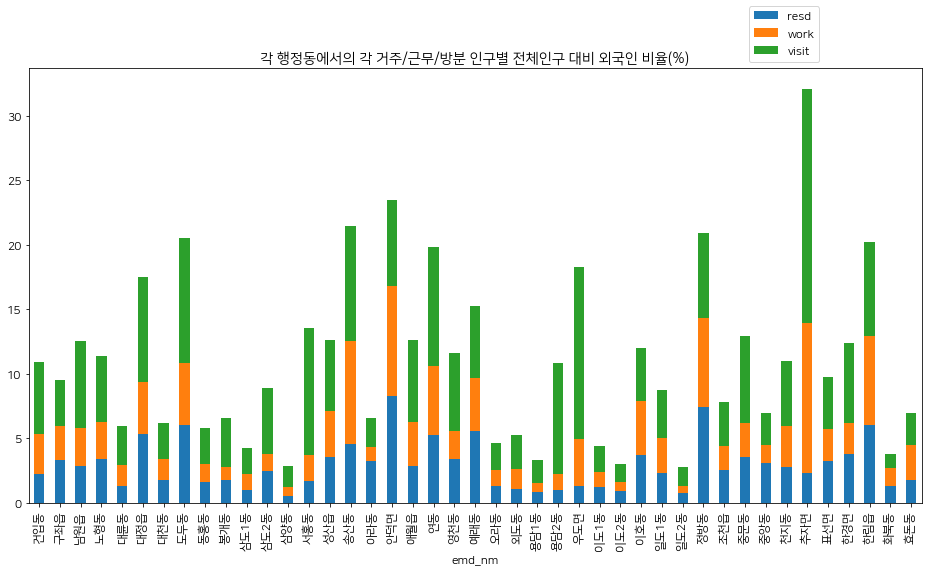

In [272]:
fore_ratio.plot(x='emd_nm',kind='bar',stacked=True,figsize=(16,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('각 행정동에서의 각 거주/근무/방분 인구별 전체인구 대비 외국인 비율(%)')
plt.show() # 비율의 합이 전체대비 외국인 비율이 아님(각 인구에서의 비율이다.)

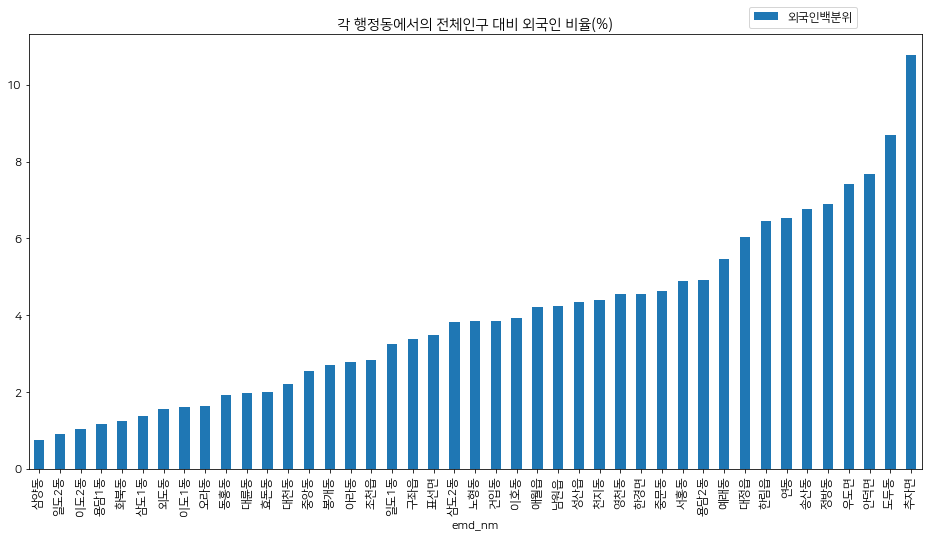

In [277]:
full_fore_ratio.sort_values('외국인백분위').plot(x='emd_nm',kind='bar',stacked=True,figsize=(16,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('각 행정동에서의 전체인구 대비 외국인 비율(%)')
plt.show()

- 추자면 > 도두동 > 애월읍 > 안덕면 > 우도면 > ...
- 쓰레기 양 순
- ['노형동','이도2동','연동','일도2동','아라동','화북동''동홍동', '삼양동', '외도동', '대정읍','용담2동', '삼도1동', '오라동', '중문동', '남원읍', '대천동', '대륜동', '이도1동', '중앙동', '성산읍', '건입동', '서홍동', '애월읍', '삼도2동', '용담1동', '천지동', '한림읍', '영천동', '안덕면', '송산동', '표선면', '조천읍', '정방동', '이호동', '일도1동', '도두동', '예래동', '봉개동', '효돈동', '구좌읍', '한경면', '알수없음']

- 연동과 노형동 이외에 쓰레기 양이 많은 다른 지역들은 외국인 비중이 적은 편
- 미세하지만 연동과 노형동이 외국인 비율이 많은 다른 지역에 비해 거주비율이 높다.

## 외국인 비율과 쓰레기 양의 corr 찾기

In [279]:
fore_ratio.head()

,emd_nm,resd,work,visit
0,건입동,2.219036,3.123945,5.542044
1,구좌읍,3.346932,2.646782,3.544000
2,남원읍,2.869902,2.943493,6.768707
3,노형동,3.426433,2.811599,5.132819
4,대륜동,1.327962,1.611264,3.044178


In [280]:
full_fore_ratio.head()

,emd_nm,외국인백분위
0,건입동,3.854064
1,구좌읍,3.378430
2,남원읍,4.238274
3,노형동,3.847166
4,대륜동,1.964337


In [283]:
tmp_merge = pd.merge(fore_ratio,full_fore_ratio,on='emd_nm')

In [288]:
corr_food2 = food_data.groupby(['emd_nm']).sum()
corr_food2 = corr_food2.reset_index()
corr_fore = pd.merge(tmp_merge,corr_food2,on='emd_nm',how='outer')

In [290]:
corr_fore = corr_fore.fillna(0)

<AxesSubplot:>

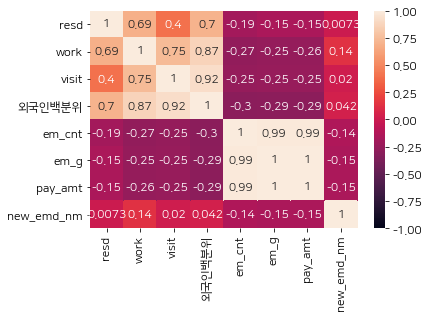

In [291]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
corr_fore['new_emd_nm'] = le.fit_transform(corr_fore['emd_nm'])
plt.figsize=(10,10)
sns.heatmap(corr_fore.drop('emd_nm',axis=1).corr(),annot=True,vmin=-1,vmax=1)

- 외국인 비율과 큰 상관관계가 없다.